In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import dedalus.public as de

# Rossby Soliton Initial Conditions

We want to test the non-linear equatorial $\beta$-plane equations, which we write "Dedalus style", with the non-linear terms on the right and the linear terms on the left

$$\partial_t u + \partial_x \phi - y v = -u \partial_x u - v \partial_y u$$
$$\partial_t v + \partial_y \phi + y v = -u \partial_x v - v \partial_y v$$
$$\partial_t \phi + \partial_x u + \partial_y v = - \partial_x (u \phi) - \partial_y (v \phi)$$

We'll use the $n=1$ soliton solution from [Boyd (1980)](https://doi.org/10.1175/1520-0485%281980%29010%3C1699:ESWPIR%3E2.0.CO;2), which is a leading order asymptotic solution to the non-linear equations above. 

First, we'll set up our grid shape parameters.

In [2]:
Lx = 40
Ly = 10

nx = 400
ny = 100


Now, we set the parameters using the values Boyd suggests in section 6,

In [3]:
A = 0.12 # this is Boyd equation 6.4
B = 0.394 # this is Boyd equation 6.5

And we construct bases and a domain to solve the problem on.

In [4]:
x = de.Fourier('x',nx,  interval=[-Lx/2, Lx/2])
y = de.Chebyshev('y',ny, interval=[-Ly/2, Ly/2])

domain = de.Domain([x,y], grid_dtype='float')

In [5]:
eta = domain.new_field()
v0 = domain.new_field()
u0 = domain.new_field()
phi0 = domain.new_field()

In [6]:
xx, yy = domain.grids()

## Initial condition

Boyd solves a KdV equation for $\eta$, the amplitude of the wave, and gets

$$\eta(\xi, \tau) = \frac{A}{\cosh^2(B(\xi - 0.395 B^2 \tau))}.$$

Here $\xi = \epsilon^{1/2} s = \epsilon^{1/2} (x - ct)$ is a scaled characteristic and $\tau = \epsilon^{3/2} t$ is a scaled time. The wave speed $c = -1/3$ for this solution, and we'll take $t = 0$ and $\epsilon = 1$ (for a justification of why we choose our "small" parameter to be 1, see Boyd section 3) to get our initial conditions, so

$$v_0 = 2 y \partial_x \eta \exp{(-y^2/2)}$$

$$u_0 = \frac{-9 + 6 y^2}{4} \eta \exp{(-y^2/2)}$$

$$\phi_0 = \frac{3 + 6 y^2}{4} \eta \exp{(-y^2/2)}$$

In [7]:
eta['g'] = A/np.cosh(B*xx)**2
deta = eta.differentiate('x')
u0['g'] = eta['g'] * (-9 + 6*yy**2)/4. * np.exp(-yy**2/2)
v0['g'] = 2 * deta['g'] * yy * np.exp(-yy**2/2)
phi0['g'] = eta['g'] * (3 + 6*yy**2)/4. * np.exp(-yy**2/2)

/home/jsoishi/miniconda3/envs/dedalus-kjb/lib/python3.6/site-packages/dedalus/core/basis.py:660: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[posfreq], cdata_in[posfreq])
/home/jsoishi/miniconda3/envs/dedalus-kjb/lib/python3.6/site-packages/dedalus/core/basis.py:661: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[badfreq], 0)


Finally, let's plot this. We need to double check that our solution is compact compared to the size of the channel (i.e. that $L_x$ and $L_y$ chosen above are good guesses).

<IPython.core.display.Javascript object>


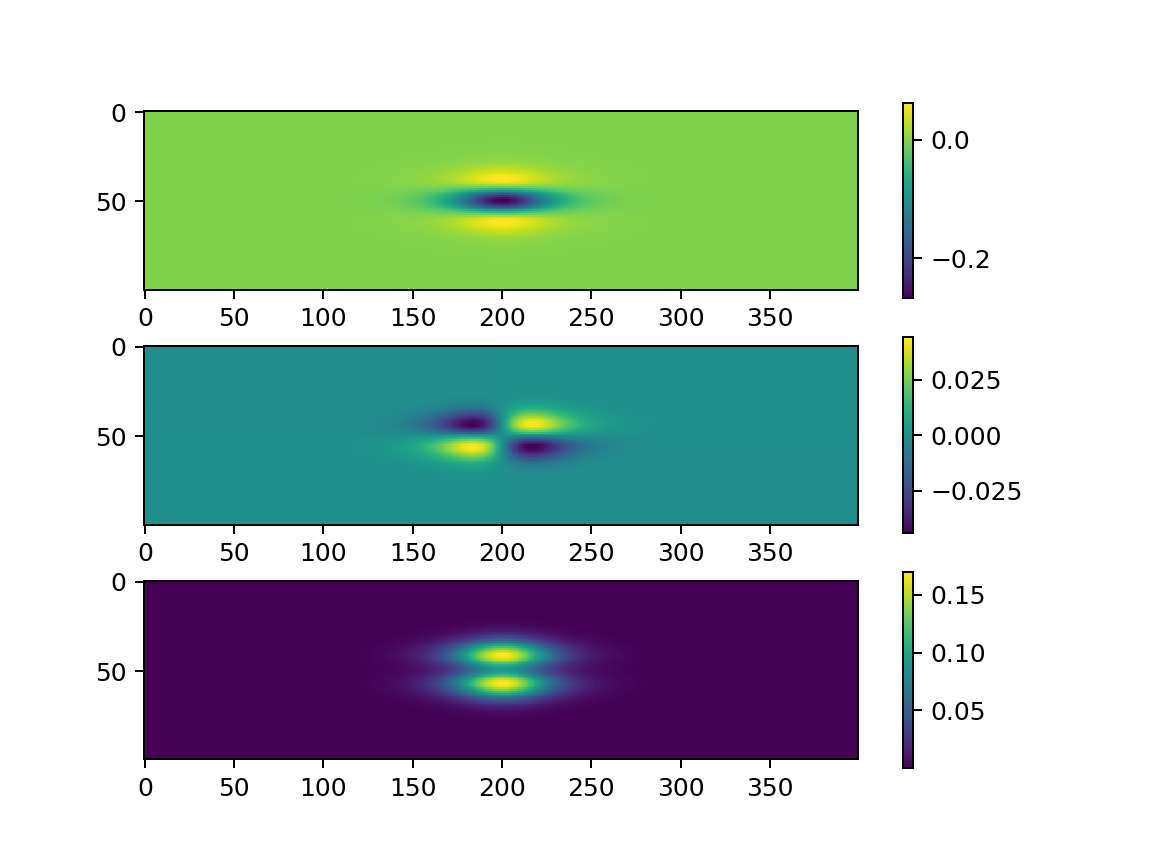

In [8]:
plt.figure()
plt.subplot(311)
plt.imshow(u0['g'].T)
plt.colorbar()
plt.subplot(312)
plt.imshow(v0['g'].T)
plt.colorbar()
plt.subplot(313)
plt.imshow(phi0['g'].T)
plt.colorbar()

Looks good! Running `rossby.py` in this directory will simulate this system!